## Import
The following code imports the necessary code to run the code in the rest of this Colaboratory.

In [0]:
import os
import zipfile
import random
import shutil
import numpy as np
from shutil import copyfile

import tensorflow as tf
from google.colab import files
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
print(tf.__version__)

2.2.0


## Download Dataset
Open this link to know how to get cookies.txt https://www.kaggle.com/general/51898

In [0]:
#upload kaggle cookies
files.upload()

In [0]:
!wget --no-check-certificate -x --load-cookies cookies.txt \
  "https://www.kaggle.com/sriramr/fruits-fresh-and-rotten-for-classification/download" \
  -O /tmp/data.zip

--2020-05-29 15:31:15--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  7.22MB/s    in 43s     

2020-05-29 15:31:58 (7.19 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



## Extract Data

In [0]:
local_zip = '/tmp/data.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

## Split Dataset to Train, Test and Validation

In [0]:
def make_dir(PATH):
  if not os.path.exists(PATH):
      os.mkdir(PATH)
      return PATH
  else:
    shutil.rmtree(PATH)
    os.mkdir(PATH)
    return PATH

In [0]:
try:
    base_dir = '/tmp'
    fruit_dir = make_dir(os.path.join(base_dir, 'fruit-dataset'))
    train_dir = make_dir(os.path.join(fruit_dir, 'train'))
    validation_dir = make_dir(os.path.join(fruit_dir, 'val'))
    test_dir = make_dir(os.path.join(fruit_dir, 'test'))

    train_fresh_apples_dir = make_dir(os.path.join(train_dir, 'Fresh Apples'))
    train_fresh_bananas_dir = make_dir(os.path.join(train_dir, 'Fresh Bananas'))
    train_fresh_oranges_dir = make_dir(os.path.join(train_dir, 'Fresh Oranges'))
    train_rotten_apples_dir = make_dir(os.path.join(train_dir, 'Rotten Apples'))
    train_rotten_bananas_dir = make_dir(os.path.join(train_dir, 'Rotten Bananas'))
    train_rotten_oranges_dir = make_dir(os.path.join(train_dir, 'Rotten Oranges'))

    validation_fresh_apples_dir = make_dir(os.path.join(validation_dir, 'Fresh Apples'))
    validation_fresh_bananas_dir = make_dir(os.path.join(validation_dir, 'Fresh Bananas'))
    validation_fresh_oranges_dir = make_dir(os.path.join(validation_dir, 'Fresh Oranges'))
    validation_rotten_apples_dir = make_dir(os.path.join(validation_dir, 'Rotten Apples'))
    validation_rotten_bananas_dir = make_dir(os.path.join(validation_dir, 'Rotten Bananas'))
    validation_rotten_oranges_dir = make_dir(os.path.join(validation_dir, 'Rotten Oranges'))

    test_fresh_apples_dir = make_dir(os.path.join(test_dir, 'Fresh Apples'))
    test_fresh_bananas_dir = make_dir(os.path.join(test_dir, 'Fresh Bananas'))
    test_fresh_oranges_dir = make_dir(os.path.join(test_dir, 'Fresh Oranges'))
    test_rotten_apples_dir = make_dir(os.path.join(test_dir, 'Rotten Apples'))
    test_rotten_bananas_dir = make_dir(os.path.join(test_dir, 'Rotten Bananas'))
    test_rotten_oranges_dir = make_dir(os.path.join(test_dir, 'Rotten Oranges'))

except OSError:
    pass

In [0]:
from PIL import Image

def split_data(SOURCE='', TRAINING='', VALIDATION='', SPLIT_SIZE=0, TEST=''):
  data = os.listdir(SOURCE)
  random_data = random.sample(data, len(data))

  train_size = len(data)*SPLIT_SIZE

  for i, filename in enumerate(random_data):
    filepath = os.path.join(SOURCE, filename)
    if os.path.getsize(filepath) > 0:
      if TEST == '' and TRAINING != '' and VALIDATION != '':
        if i < train_size:
          copyfile(filepath, os.path.join(TRAINING, filename))
          # img = Image.open(os.path.join(TRAINING, filename)).convert('L')
          # img.save(os.path.join(TRAINING, filename))
        else:
          copyfile(filepath, os.path.join(VALIDATION, filename))
          # img = Image.open(os.path.join(VALIDATION, filename)).convert('L')
          # img.save(os.path.join(VALIDATION, filename))
      else:
        copyfile(filepath, os.path.join(TEST, filename))

In [0]:
dataset_train_dir = '/tmp/dataset/train'
dataset_test_dir = '/tmp/dataset/test'

fapples_train_dir = os.path.join(dataset_train_dir, 'freshapples')
fbananas_train_dir = os.path.join(dataset_train_dir, 'freshbanana')
foranges_train_dir = os.path.join(dataset_train_dir, 'freshoranges')
rapples_train_dir = os.path.join(dataset_train_dir, 'rottenapples')
rbananas_train_dir = os.path.join(dataset_train_dir, 'rottenbanana')
roranges_train_dir = os.path.join(dataset_train_dir, 'rottenoranges')

fapples_test_dir = os.path.join(dataset_test_dir, 'freshapples')
fbananas_test_dir = os.path.join(dataset_test_dir, 'freshbanana')
foranges_test_dir = os.path.join(dataset_test_dir, 'freshoranges')
rapples_test_dir = os.path.join(dataset_test_dir, 'rottenapples')
rbananas_test_dir = os.path.join(dataset_test_dir, 'rottenbanana')
roranges_test_dir = os.path.join(dataset_test_dir, 'rottenoranges')

print('fapples_train images = ', len(os.listdir(fapples_train_dir)))
print('fbananas_train images = ', len(os.listdir(fbananas_train_dir)))
print('foranges_train images = ', len(os.listdir(foranges_train_dir)))
print('rapples_train images = ', len(os.listdir(rapples_train_dir)))
print('rbananas_train images = ', len(os.listdir(rbananas_train_dir)))
print('roranges_train images = ', len(os.listdir(roranges_train_dir)))
print()
print('fapples_test images = ', len(os.listdir(fapples_test_dir)))
print('fbananas_test images = ', len(os.listdir(fbananas_test_dir)))
print('foranges_test images = ', len(os.listdir(foranges_test_dir)))
print('rapples_test images = ', len(os.listdir(rapples_test_dir)))
print('rbananas_test images = ', len(os.listdir(rbananas_test_dir)))
print('roranges_test images = ', len(os.listdir(roranges_test_dir)))

rock images =  726
paper images =  712
scissors images =  750


In [0]:
SPLIT_SIZE = .77
split_data(fapples_train_dir, train_fresh_apples_dir, validation_fresh_apples_dir, SPLIT_SIZE)
split_data(fbananas_train_dir, train_fresh_bananas_dir, validation_fresh_bananas_dir, SPLIT_SIZE)
split_data(foranges_train_dir, train_fresh_oranges_dir, validation_fresh_oranges_dir, SPLIT_SIZE)
split_data(rapples_train_dir, train_rotten_apples_dir, validation_rotten_apples_dir, SPLIT_SIZE)
split_data(rbananas_train_dir, train_rotten_bananas_dir, validation_rotten_bananas_dir, SPLIT_SIZE)
split_data(roranges_train_dir, train_rotten_oranges_dir, validation_rotten_oranges_dir, SPLIT_SIZE)

split_data(SOURCE=fapples_test_dir, TEST=test_fresh_apples_dir)
split_data(SOURCE=fbananas_test_dir, TEST=test_fresh_bananas_dir)
split_data(SOURCE=foranges_test_dir, TEST=test_fresh_oranges_dir)
split_data(SOURCE=rapples_test_dir, TEST=test_rotten_apples_dir)
split_data(SOURCE=rbananas_test_dir, TEST=test_rotten_bananas_dir)
split_data(SOURCE=roranges_test_dir, TEST=test_rotten_oranges_dir)

In [0]:
print(len(os.listdir('/tmp/fruit-dataset/train/Fresh Apples/')))
print(len(os.listdir('/tmp/fruit-dataset/train/Fresh Bananas/')))
print(len(os.listdir('/tmp/fruit-dataset/train/Fresh Oranges/')))
print(len(os.listdir('/tmp/fruit-dataset/train/Rotten Apples/')))
print(len(os.listdir('/tmp/fruit-dataset/train/Rotten Bananas/')))
print(len(os.listdir('/tmp/fruit-dataset/train/Rotten Oranges/')))
print()
print(len(os.listdir('/tmp/fruit-dataset/val/Fresh Apples/')))
print(len(os.listdir('/tmp/fruit-dataset/val/Fresh Bananas/')))
print(len(os.listdir('/tmp/fruit-dataset/val/Fresh Oranges/')))
print(len(os.listdir('/tmp/fruit-dataset/val/Rotten Apples/')))
print(len(os.listdir('/tmp/fruit-dataset/val/Rotten Bananas/')))
print(len(os.listdir('/tmp/fruit-dataset/val/Rotten Oranges/')))
print()
print(len(os.listdir('/tmp/fruit-dataset/test/Fresh Apples/')))
print(len(os.listdir('/tmp/fruit-dataset/test/Fresh Bananas/')))
print(len(os.listdir('/tmp/fruit-dataset/test/Fresh Oranges/')))
print(len(os.listdir('/tmp/fruit-dataset/test/Rotten Apples/')))
print(len(os.listdir('/tmp/fruit-dataset/test/Rotten Bananas/')))
print(len(os.listdir('/tmp/fruit-dataset/test/Rotten Oranges/')))

509
499
525
217
213
225


## Augmentation

In [0]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40, #20, 40, 60
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40, #20, 40, 60
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

## Image Data Generator

In [0]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=32, #4, 10, 20, 32
                                                    # color_mode = "grayscale",
                                                    target_size=(150,150))

validation_generator = train_datagen.flow_from_directory(validation_dir,
                                                         batch_size=32, #4, 10, 20, 32
                                                        #  color_mode = "grayscale",
                                                         target_size=(150,150))

Found 1533 images belonging to 3 classes.
Found 655 images belonging to 3 classes.


## Callbacks

In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.98):
      print("\nReached 98% accuracy. Stop Training")
      self.model.stop_training = True

callbacks = myCallback()

## Sequential Model

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 64)       

In [0]:
train_len = len(os.listdir('/tmp/dicoding/train/rock/'))+len(os.listdir('/tmp/dicoding/train/paper/'))+len(os.listdir('/tmp/dicoding/train/scissors/'))
val_len = len(os.listdir('/tmp/dicoding/val/rock/'))+len(os.listdir('/tmp/dicoding/val/paper/'))+len(os.listdir('/tmp/dicoding/val/scissors/'))

history = model.fit(
    train_generator,
    steps_per_epoch=(train_len/32),
    epochs=20,
    verbose=1,
    callbacks=[callbacks],
    validation_data=validation_generator,
    validation_steps=(val_len/32)
)

Epoch 1/20
48/47 [==============================] - 57s 1s/step - loss: 1.0620 - accuracy: 0.4044 - val_loss: 0.9383 - val_accuracy: 0.5191
Epoch 2/20
48/47 [==============================] - 58s 1s/step - loss: 0.6727 - accuracy: 0.7189 - val_loss: 0.5482 - val_accuracy: 0.8107
Epoch 3/20
48/47 [==============================] - 58s 1s/step - loss: 0.5430 - accuracy: 0.7671 - val_loss: 0.5084 - val_accuracy: 0.8031
Epoch 4/20
48/47 [==============================] - 57s 1s/step - loss: 0.4465 - accuracy: 0.8311 - val_loss: 0.3695 - val_accuracy: 0.8794
Epoch 5/20
48/47 [==============================] - 60s 1s/step - loss: 0.3741 - accuracy: 0.8617 - val_loss: 0.2847 - val_accuracy: 0.9115
Epoch 6/20
48/47 [==============================] - 57s 1s/step - loss: 0.3046 - accuracy: 0.8995 - val_loss: 0.2374 - val_accuracy: 0.9466
Epoch 7/20
48/47 [==============================] - 57s 1s/step - loss: 0.2819 - accuracy: 0.8956 - val_loss: 0.2087 - val_accuracy: 0.9389
Epoch 8/20
48/47 [==

## Plot Loss and Accuracy

<Figure size 432x288 with 0 Axes>

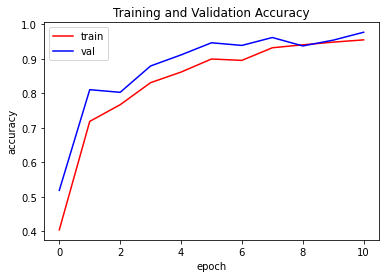

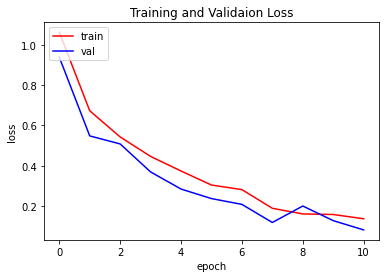

<Figure size 432x288 with 0 Axes>

In [0]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.figure()

## Predict Image

Saving paper_lb.jpg to paper_lb (17).jpg
Saving paper_rb.jpg to paper_rb (25).jpg
Saving rock_lb.jpg to rock_lb (17).jpg
Saving rock_rb.jpg to rock_rb (25).jpg
Saving scissors_lb.jpg to scissors_lb (17).jpg
Saving scissors_rb.jpg to scissors_rb (24).jpg

paper_lb.jpg
[[0. 0. 1.]]
[2]
scissors

paper_rb.jpg
[[1. 0. 0.]]
[0]
paper

rock_lb.jpg
[[0. 1. 0.]]
[1]
rock

rock_rb.jpg
[[0. 1. 0.]]
[1]
rock

scissors_lb.jpg
[[0. 0. 1.]]
[2]
scissors

scissors_rb.jpg
[[0. 0. 1.]]
[2]
scissors


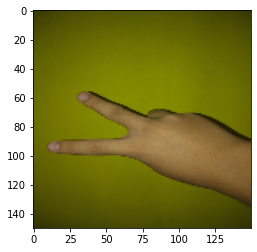

In [0]:
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print("")
  print(fn)
  print(classes)

  max = np.amax(classes[0])
  print(np.where(classes[0] == max)[0])
  if np.where(classes[0] == max)[0] == 0:
    print('paper')
  elif np.where(classes[0] == max)[0] == 1:
    print('rock')
  else:
    print('scissors')